# Integration Tests 

In [2]:
## Import the Forest-Guided Clustering package
from fgclustering import (
    DistanceRandomForestProximity,
    ClusteringKMedoids,
    ClusteringClara,
    forest_guided_clustering, 
    forest_guided_feature_importance, 
    plot_forest_guided_feature_importance, 
    plot_forest_guided_decision_paths
)

## Imports for datasets
from palmerpenguins import load_penguins
from sklearn.datasets import load_breast_cancer, load_iris, fetch_california_housing

## Additional imports for use-cases
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

/opt/anaconda3/envs/fgc/lib/python3.12/site-packages/palmerpenguins/penguins.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


## Binary Classification: Breast Cancer Dataset

In [3]:
data_breast_cancer = load_breast_cancer(as_frame=True)
data_breast_cancer = data_breast_cancer.frame
data_breast_cancer['target'] = data_breast_cancer['target'].map({0: 'malignant', 1: 'benign'})

X_breast_cancer = data_breast_cancer.loc[:, data_breast_cancer.columns != 'target']
y_breast_cancer = data_breast_cancer.target

grid = {'max_depth':[2, 5], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestClassifier(max_samples=0.8, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_breast_cancer, y_breast_cancer)
rf_breast_cancer = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB accuracy of prediction model:')
print(rf_breast_cancer.oob_score_)

Parameters of best prediction model:
{'max_depth': 5, 'max_features': 'sqrt'}
OOB accuracy of prediction model:
0.9543057996485061


In [4]:
fgc = forest_guided_clustering(
    estimator=rf_breast_cancer, 
    X=X_breast_cancer, 
    y=y_breast_cancer, 
    clustering_distance_metric=DistanceRandomForestProximity(memory_efficient=False), 
    clustering_strategy=ClusteringKMedoids()
)

Using a sample size of 80.0 % of the input data.
Using range k = (2, 6) to optimize k.


Optimizing k: 100%|██████████| 5/5 [00:21<00:00,  4.38s/it]


Optimal number of clusters k = 2

Clustering Evaluation Summary:
 k    Score  Stable  Mean_JI                                                   Cluster_JI
 2 0.066136    True    0.998                                         {1: 0.998, 2: 0.997}
 3 0.074790    True    0.988                                {1: 0.97, 2: 0.998, 3: 0.996}
 4 0.106564    True    0.884                     {1: 0.921, 2: 0.958, 3: 0.991, 4: 0.664}
 5 0.113760    True    0.941            {1: 0.964, 2: 0.971, 3: 0.996, 4: 0.866, 5: 0.91}
 6 0.085089    True    0.881 {1: 0.929, 2: 0.838, 3: 0.667, 4: 0.958, 5: 0.917, 6: 0.977}


In [5]:
feature_importance = forest_guided_feature_importance(
    X=X_breast_cancer, 
    y=y_breast_cancer, 
    cluster_labels=fgc.cluster_labels,
    model_type=fgc.model_type
)

100%|██████████| 30/30 [00:00<00:00, 2573.56it/s]


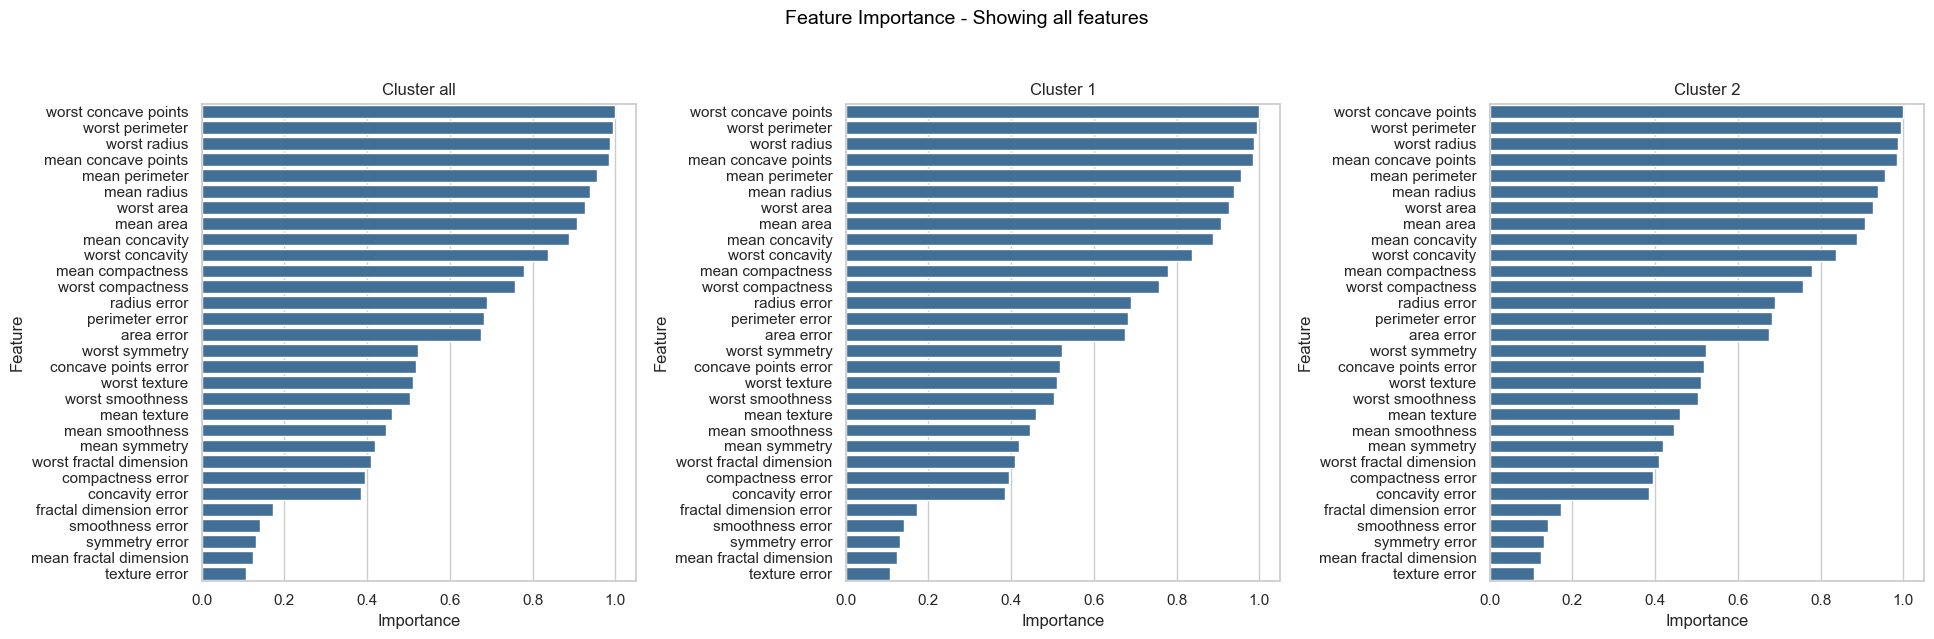

In [6]:
plot_forest_guided_feature_importance(
    feature_importance_local=feature_importance.feature_importance_local,
    feature_importance_global=feature_importance.feature_importance_global
)

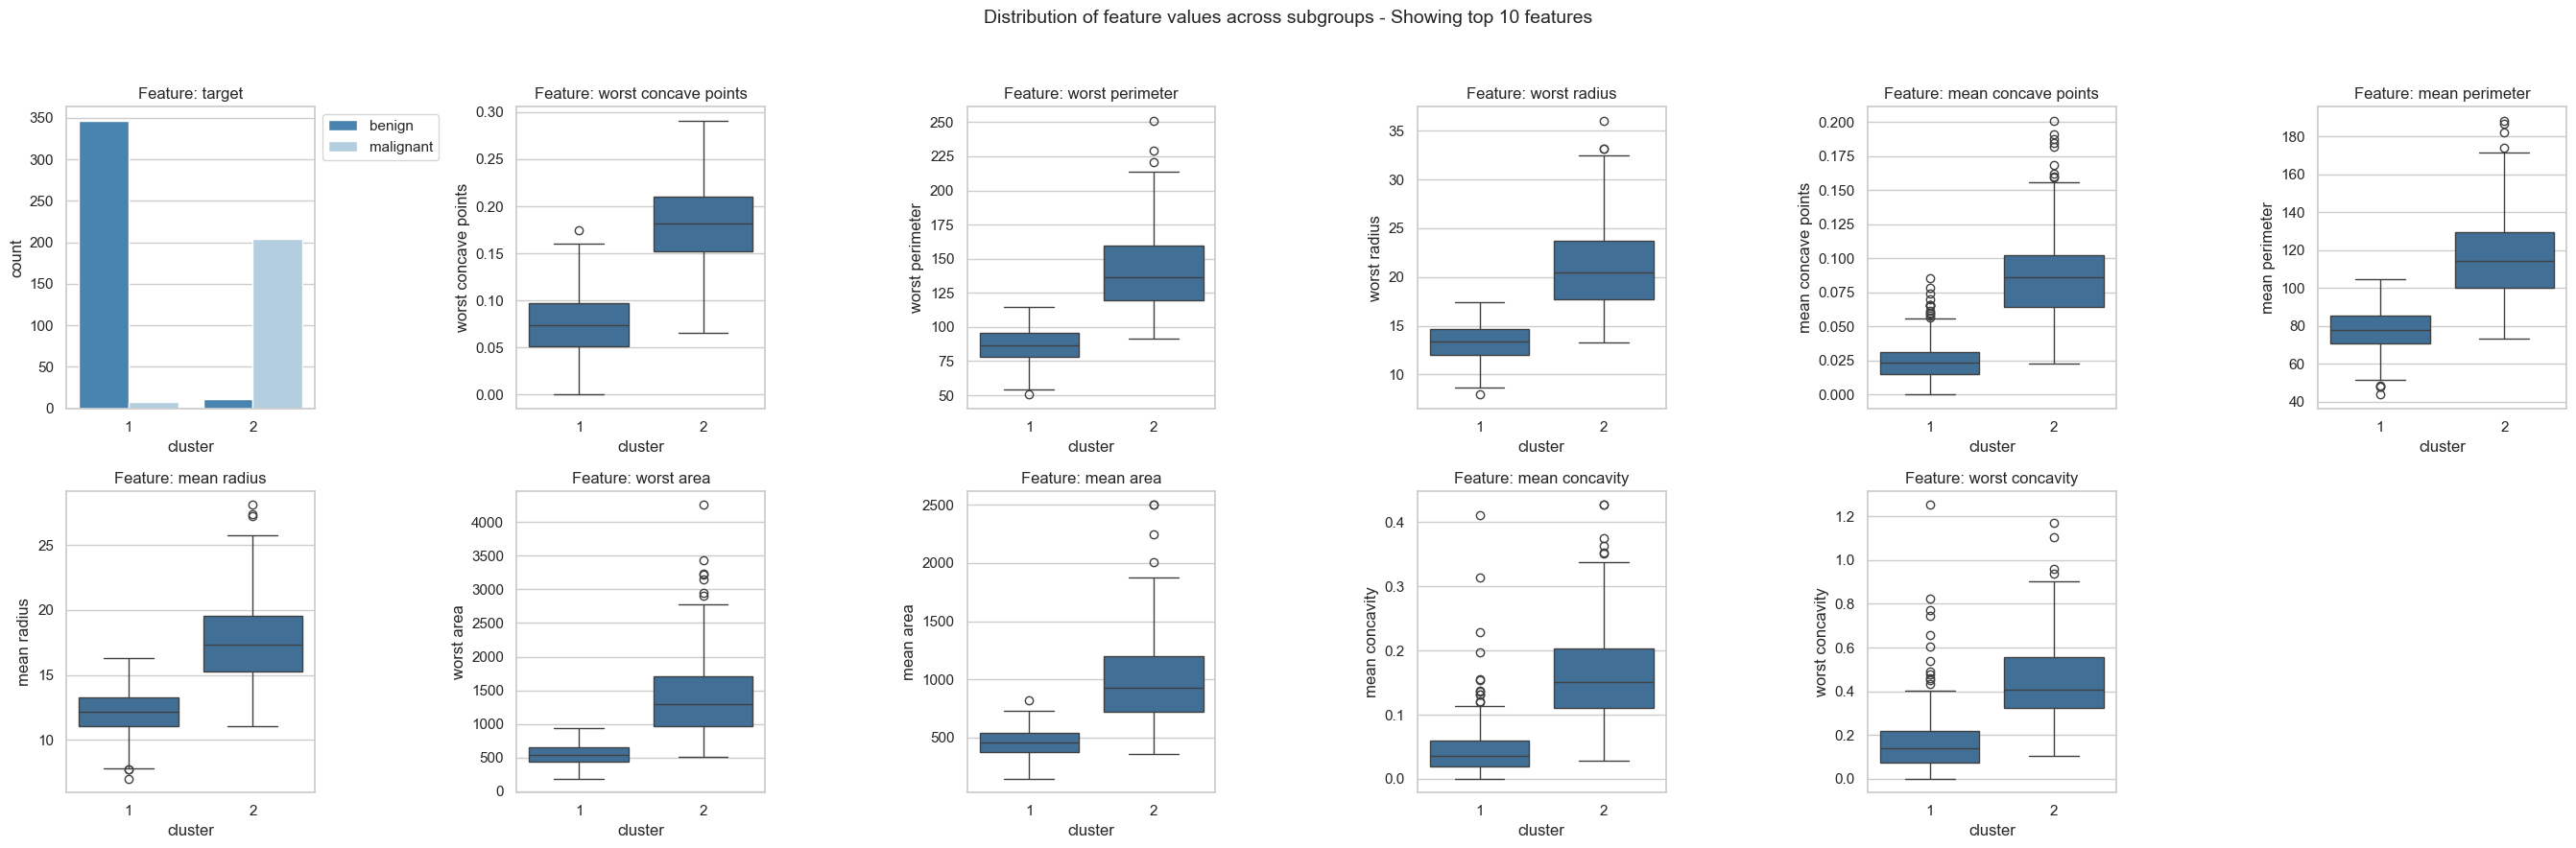

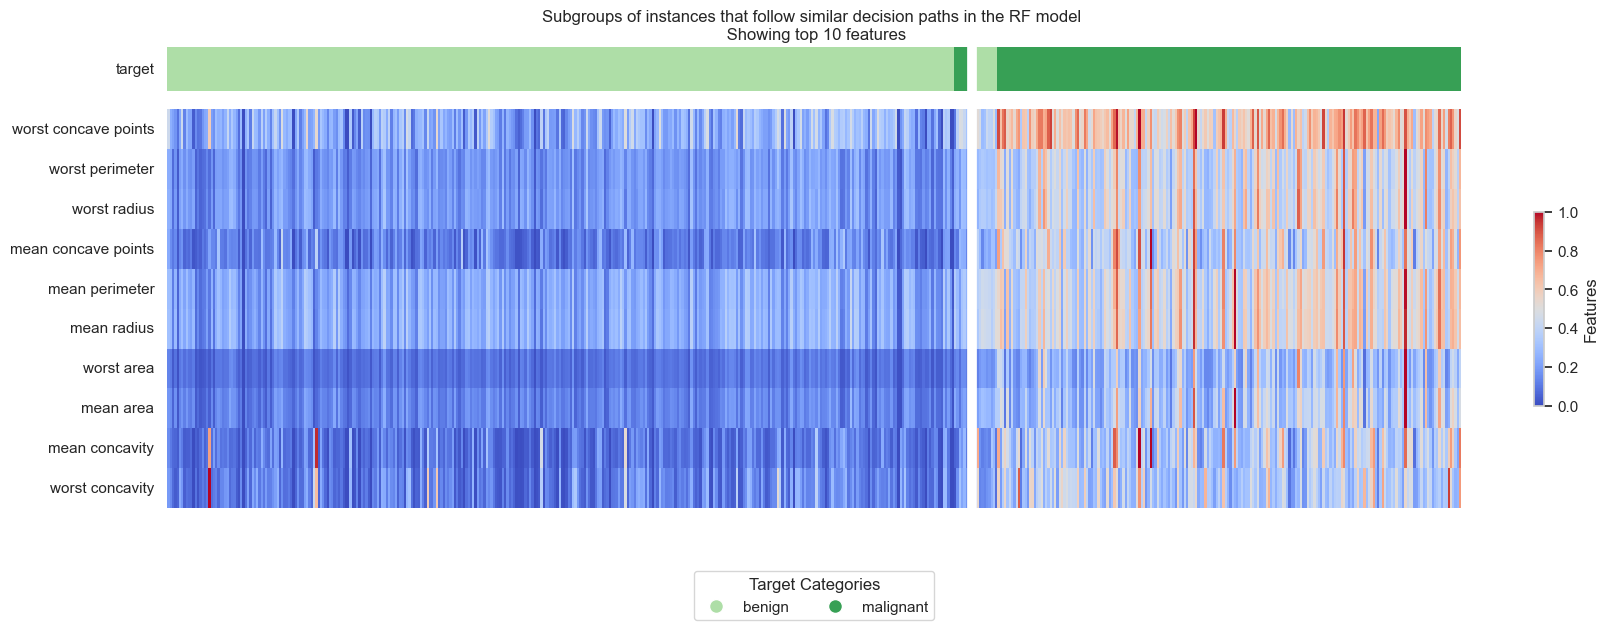

In [7]:
plot_forest_guided_decision_paths(
    data_clustering=feature_importance.data_clustering,
    model_type=fgc.model_type,
    top_n=10
)

## Multiclass Classification: Iris Dataset

In [8]:
data_iris = load_iris(as_frame=True)
data_iris = data_iris.frame
data_iris['target'] = data_iris['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

X_iris = data_iris.loc[:, data_iris.columns != 'target']
y_iris = data_iris.target

grid = {'max_depth':[2, 5], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestClassifier(max_samples=0.8, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_iris, y_iris)
rf_iris = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB accuracy of prediction model:')
print(rf_iris.oob_score_)

Parameters of best prediction model:
{'max_depth': 5, 'max_features': 'sqrt'}
OOB accuracy of prediction model:
0.9533333333333334


In [9]:
fgc = forest_guided_clustering(
    estimator=rf_iris, 
    X=X_iris, 
    y=y_iris, 
    clustering_distance_metric=DistanceRandomForestProximity(memory_efficient=False), 
    clustering_strategy=ClusteringKMedoids(method="pam")
)

Using a sample size of 80.0 % of the input data.
Using range k = (2, 6) to optimize k.


Optimizing k: 100%|██████████| 5/5 [00:20<00:00,  4.08s/it]


Optimal number of clusters k = 3

Clustering Evaluation Summary:
 k    Score  Stable  Mean_JI                                                 Cluster_JI
 2 0.356309    True    0.736                                        {1: 0.722, 2: 0.75}
 3 0.063009    True    1.000                                   {1: 1.0, 2: 1.0, 3: 1.0}
 4 0.110571    True    0.847                     {1: 0.859, 2: 1.0, 3: 0.965, 4: 0.565}
 5 0.092406    True    0.868            {1: 0.821, 2: 1.0, 3: 0.975, 4: 0.64, 5: 0.905}
 6 0.144902    True    0.847 {1: 0.829, 2: 0.975, 3: 0.939, 4: 0.759, 5: 0.582, 6: 1.0}


In [10]:
feature_importance = forest_guided_feature_importance(
    X=X_iris, 
    y=y_iris, 
    cluster_labels=fgc.cluster_labels,
    model_type=fgc.model_type,
)

100%|██████████| 4/4 [00:00<00:00, 2022.33it/s]


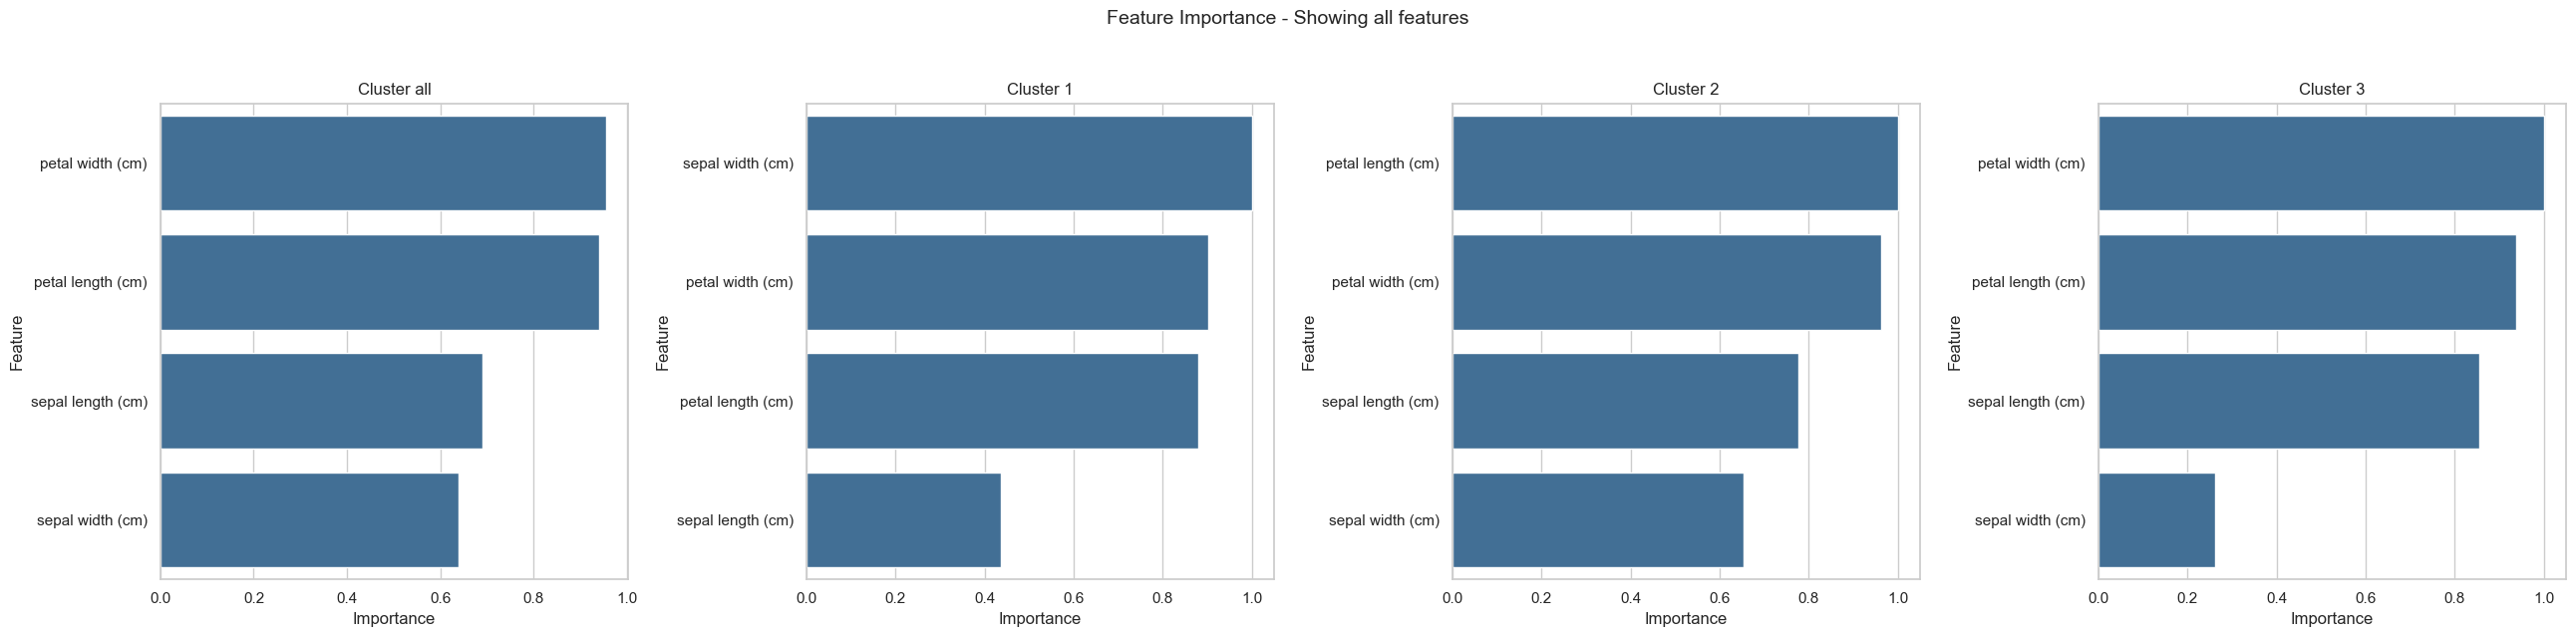

In [11]:
plot_forest_guided_feature_importance(
    feature_importance_local=feature_importance.feature_importance_local,
    feature_importance_global=feature_importance.feature_importance_global
)

In [12]:
plot_forest_guided_decision_paths(
    data_clustering=feature_importance.data_clustering,
    model_type=fgc.model_type,
    distributions=False,
    heatmap_type="interactive"
)

## Multiclass Classification: Penguins Dataset

In [13]:
data_penguins = load_penguins()
data_penguins.rename(columns={'species':'target'}, inplace=True)

# Remove the instances with missing values and check how many we are left with
print(f"Before omiting the missing values the dataset has {data_penguins.shape[0]} instances")
data_penguins.dropna(inplace=True)
print(f"After omiting the missing values the dataset has {data_penguins.shape[0]} instances")

# preprocess categorical features such that they can be used for the RF model
data_penguins_encoded = pd.get_dummies(data_penguins, columns=['island', 'sex'], prefix=['island', 'sex'], drop_first=True)

X_penguins = data_penguins_encoded.loc[:, data_penguins_encoded.columns != 'target']
y_penguins = data_penguins_encoded.target

grid = {'max_depth':[2, 5], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestClassifier(max_samples=0.8, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_penguins, y_penguins)
rf_penguins = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB accuracy of prediction model:')
print(rf_penguins.oob_score_)

Before omiting the missing values the dataset has 344 instances
After omiting the missing values the dataset has 333 instances
Parameters of best prediction model:
{'max_depth': 5, 'max_features': 'sqrt'}
OOB accuracy of prediction model:
0.984984984984985


In [14]:
fgc = forest_guided_clustering(
    estimator=rf_penguins, 
    X=X_penguins, 
    y=y_penguins, 
    clustering_distance_metric=DistanceRandomForestProximity(memory_efficient=False), 
    clustering_strategy=ClusteringKMedoids(method="fasterpam", max_iter=200)
)

Using a sample size of 80.0 % of the input data.
Using range k = (2, 6) to optimize k.


Optimizing k: 100%|██████████| 5/5 [00:24<00:00,  4.87s/it]


Optimal number of clusters k = 3

Clustering Evaluation Summary:
 k    Score  Stable  Mean_JI                                                 Cluster_JI
 2 0.296326    True    0.994                                       {1: 0.996, 2: 0.993}
 3 0.018666    True    0.997                             {1: 0.997, 2: 0.997, 3: 0.996}
 4 0.077212    True    0.988                       {1: 0.974, 2: 0.977, 3: 1.0, 4: 1.0}
 5 0.025349    True    0.901           {1: 0.979, 2: 0.777, 3: 0.913, 4: 1.0, 5: 0.836}
 6 0.021124    True    0.965 {1: 0.986, 2: 0.933, 3: 0.974, 4: 1.0, 5: 0.966, 6: 0.929}


In [15]:
X_add_features = data_penguins.drop('target', axis=1)
X_add_features['island'] = X_add_features['island'].astype('category')
X_add_features['sex'] = X_add_features['sex'].astype('category')

In [16]:
feature_importance = forest_guided_feature_importance(
    X=X_add_features, 
    y=y_penguins, 
    cluster_labels=fgc.cluster_labels,
    model_type=fgc.model_type,
    feature_importance_distance_metric="jensenshannon",
)

100%|██████████| 7/7 [00:00<00:00, 695.82it/s]


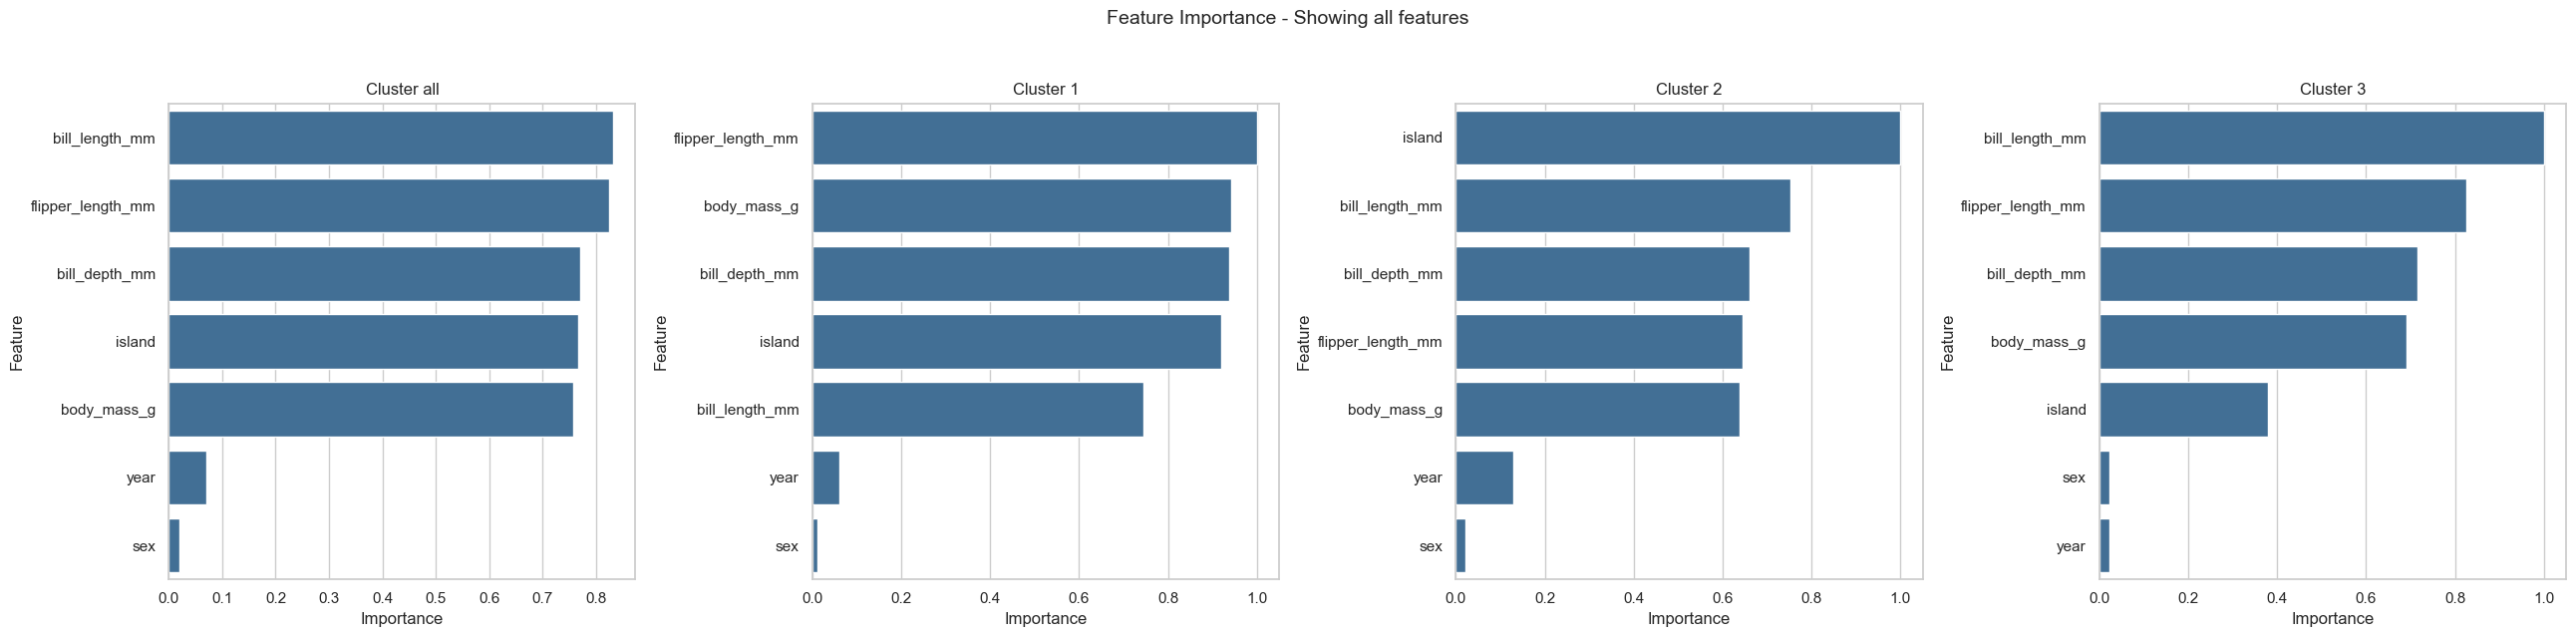

In [17]:
plot_forest_guided_feature_importance(
    feature_importance_local=feature_importance.feature_importance_local,
    feature_importance_global=feature_importance.feature_importance_global
)

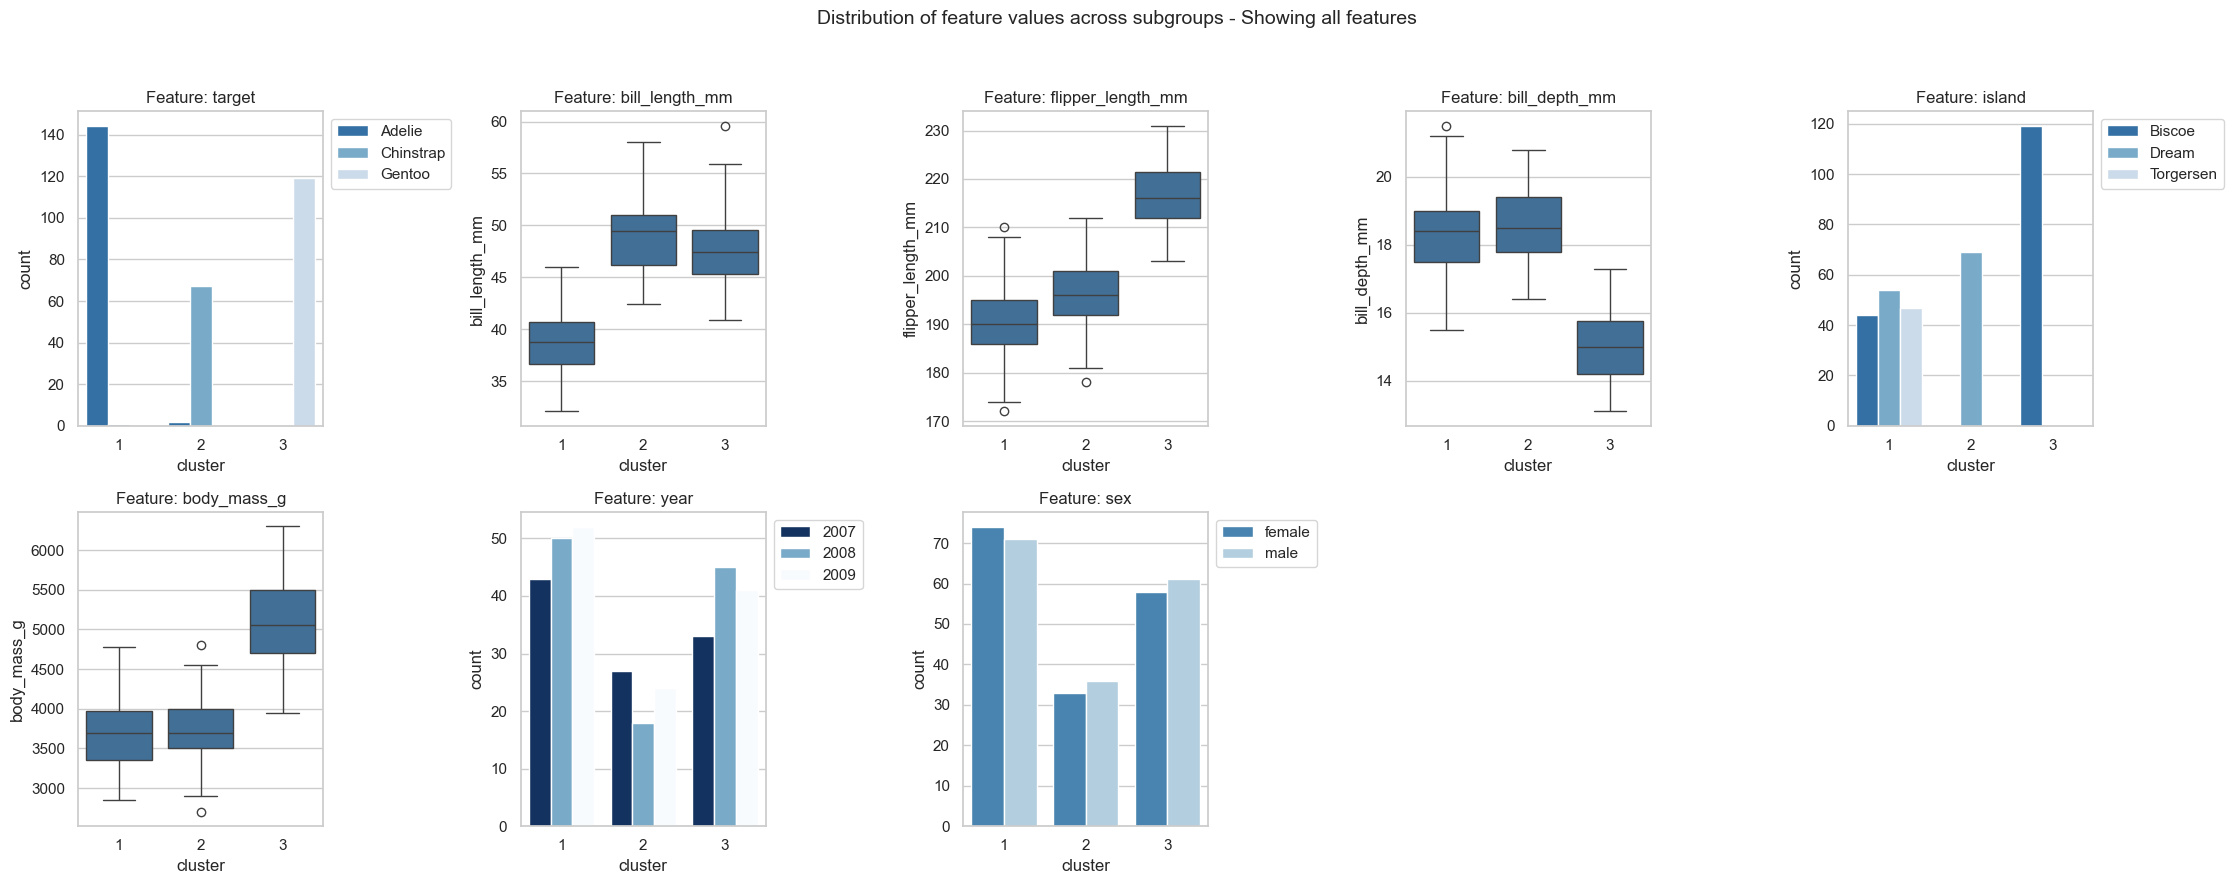

In [18]:
plot_forest_guided_decision_paths(
    data_clustering=feature_importance.data_clustering,
    model_type=fgc.model_type,
    heatmap=False,
    num_cols=5
)

## Regression: California Housing Dataset

In [19]:
data_housing = fetch_california_housing(as_frame=True)
data_housing = data_housing.frame
data_housing.rename(columns={'MedHouseVal':'target'}, inplace=True)

# for sake of runtime we only use the first 3000 samples
# data_housing = data_housing[:3000]
# data_housing.head()

X_housing = data_housing.loc[:, data_housing.columns != 'target']
y_housing = data_housing.target

print(f"Traing model for {X_housing.shape[0]} house blocks")

grid = {'max_depth':[5, 10], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestRegressor(n_estimators=100, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_housing, y_housing)
rf_housing = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB R^2 of prediction model:')
print(rf_housing.oob_score_)

Traing model for 20640 house blocks
Parameters of best prediction model:
{'max_depth': 10, 'max_features': 'log2'}
OOB R^2 of prediction model:
0.7874297729402784


In [20]:
n_jobs = 1

fgc = forest_guided_clustering(
    k=(2,6),
    estimator=rf_housing, 
    X=X_housing, 
    y=y_housing, 
    clustering_distance_metric=DistanceRandomForestProximity(memory_efficient=True, dir_distance_matrix="./"), 
    clustering_strategy=ClusteringClara(sampling_iter=5, sub_sample_size=0.6, method="fasterpam"),
    JI_bootstrap_iter=5, 
    JI_bootstrap_sample_size=1.0, 
    JI_discart_value=0.6,
    n_jobs=n_jobs, 
)

Using range k = (2, 6) to optimize k.


Optimizing k: 100%|██████████| 5/5 [06:21<00:00, 76.26s/it]


Optimal number of clusters k = 6

Clustering Evaluation Summary:
 k    Score  Stable  Mean_JI                                                   Cluster_JI
 2      NaN   False    0.418                                           {1: 0.637, 2: 0.2}
 3      NaN   False    0.570                                {1: 0.564, 2: 0.39, 3: 0.756}
 4 0.923951    True    0.646                     {1: 0.604, 2: 0.735, 3: 0.499, 4: 0.748}
 5 0.771415    True    0.601           {1: 0.563, 2: 0.497, 3: 0.886, 4: 0.666, 5: 0.393}
 6 0.761300    True    0.708 {1: 0.571, 2: 0.735, 3: 0.915, 4: 0.963, 5: 0.388, 6: 0.675}


In [21]:
n_jobs = 5

fgc = forest_guided_clustering(
    k=(2,6),
    estimator=rf_housing, 
    X=X_housing, 
    y=y_housing, 
    clustering_distance_metric=DistanceRandomForestProximity(memory_efficient=True, dir_distance_matrix="./"), 
    clustering_strategy=ClusteringClara(sampling_iter=5, sub_sample_size=0.6, method="fasterpam"),
    JI_bootstrap_iter=5, 
    JI_bootstrap_sample_size=1.0, 
    JI_discart_value=0.6,
    n_jobs=n_jobs, 
)

Using range k = (2, 6) to optimize k.


Optimizing k: 100%|██████████| 5/5 [06:10<00:00, 74.05s/it]


Optimal number of clusters k = 6

Clustering Evaluation Summary:
 k    Score  Stable  Mean_JI                                                   Cluster_JI
 2      NaN   False    0.418                                           {1: 0.637, 2: 0.2}
 3      NaN   False    0.570                                {1: 0.564, 2: 0.39, 3: 0.756}
 4 0.923951    True    0.646                     {1: 0.604, 2: 0.735, 3: 0.499, 4: 0.748}
 5 0.771415    True    0.601           {1: 0.563, 2: 0.497, 3: 0.886, 4: 0.666, 5: 0.393}
 6 0.761300    True    0.708 {1: 0.571, 2: 0.735, 3: 0.915, 4: 0.963, 5: 0.388, 6: 0.675}


In [22]:
feature_importance = forest_guided_feature_importance(
    X=X_housing, 
    y=y_housing, 
    cluster_labels=fgc.cluster_labels,
    model_type=fgc.model_type,
    feature_importance_distance_metric="wasserstein",
)

100%|██████████| 8/8 [00:00<00:00, 54.77it/s]


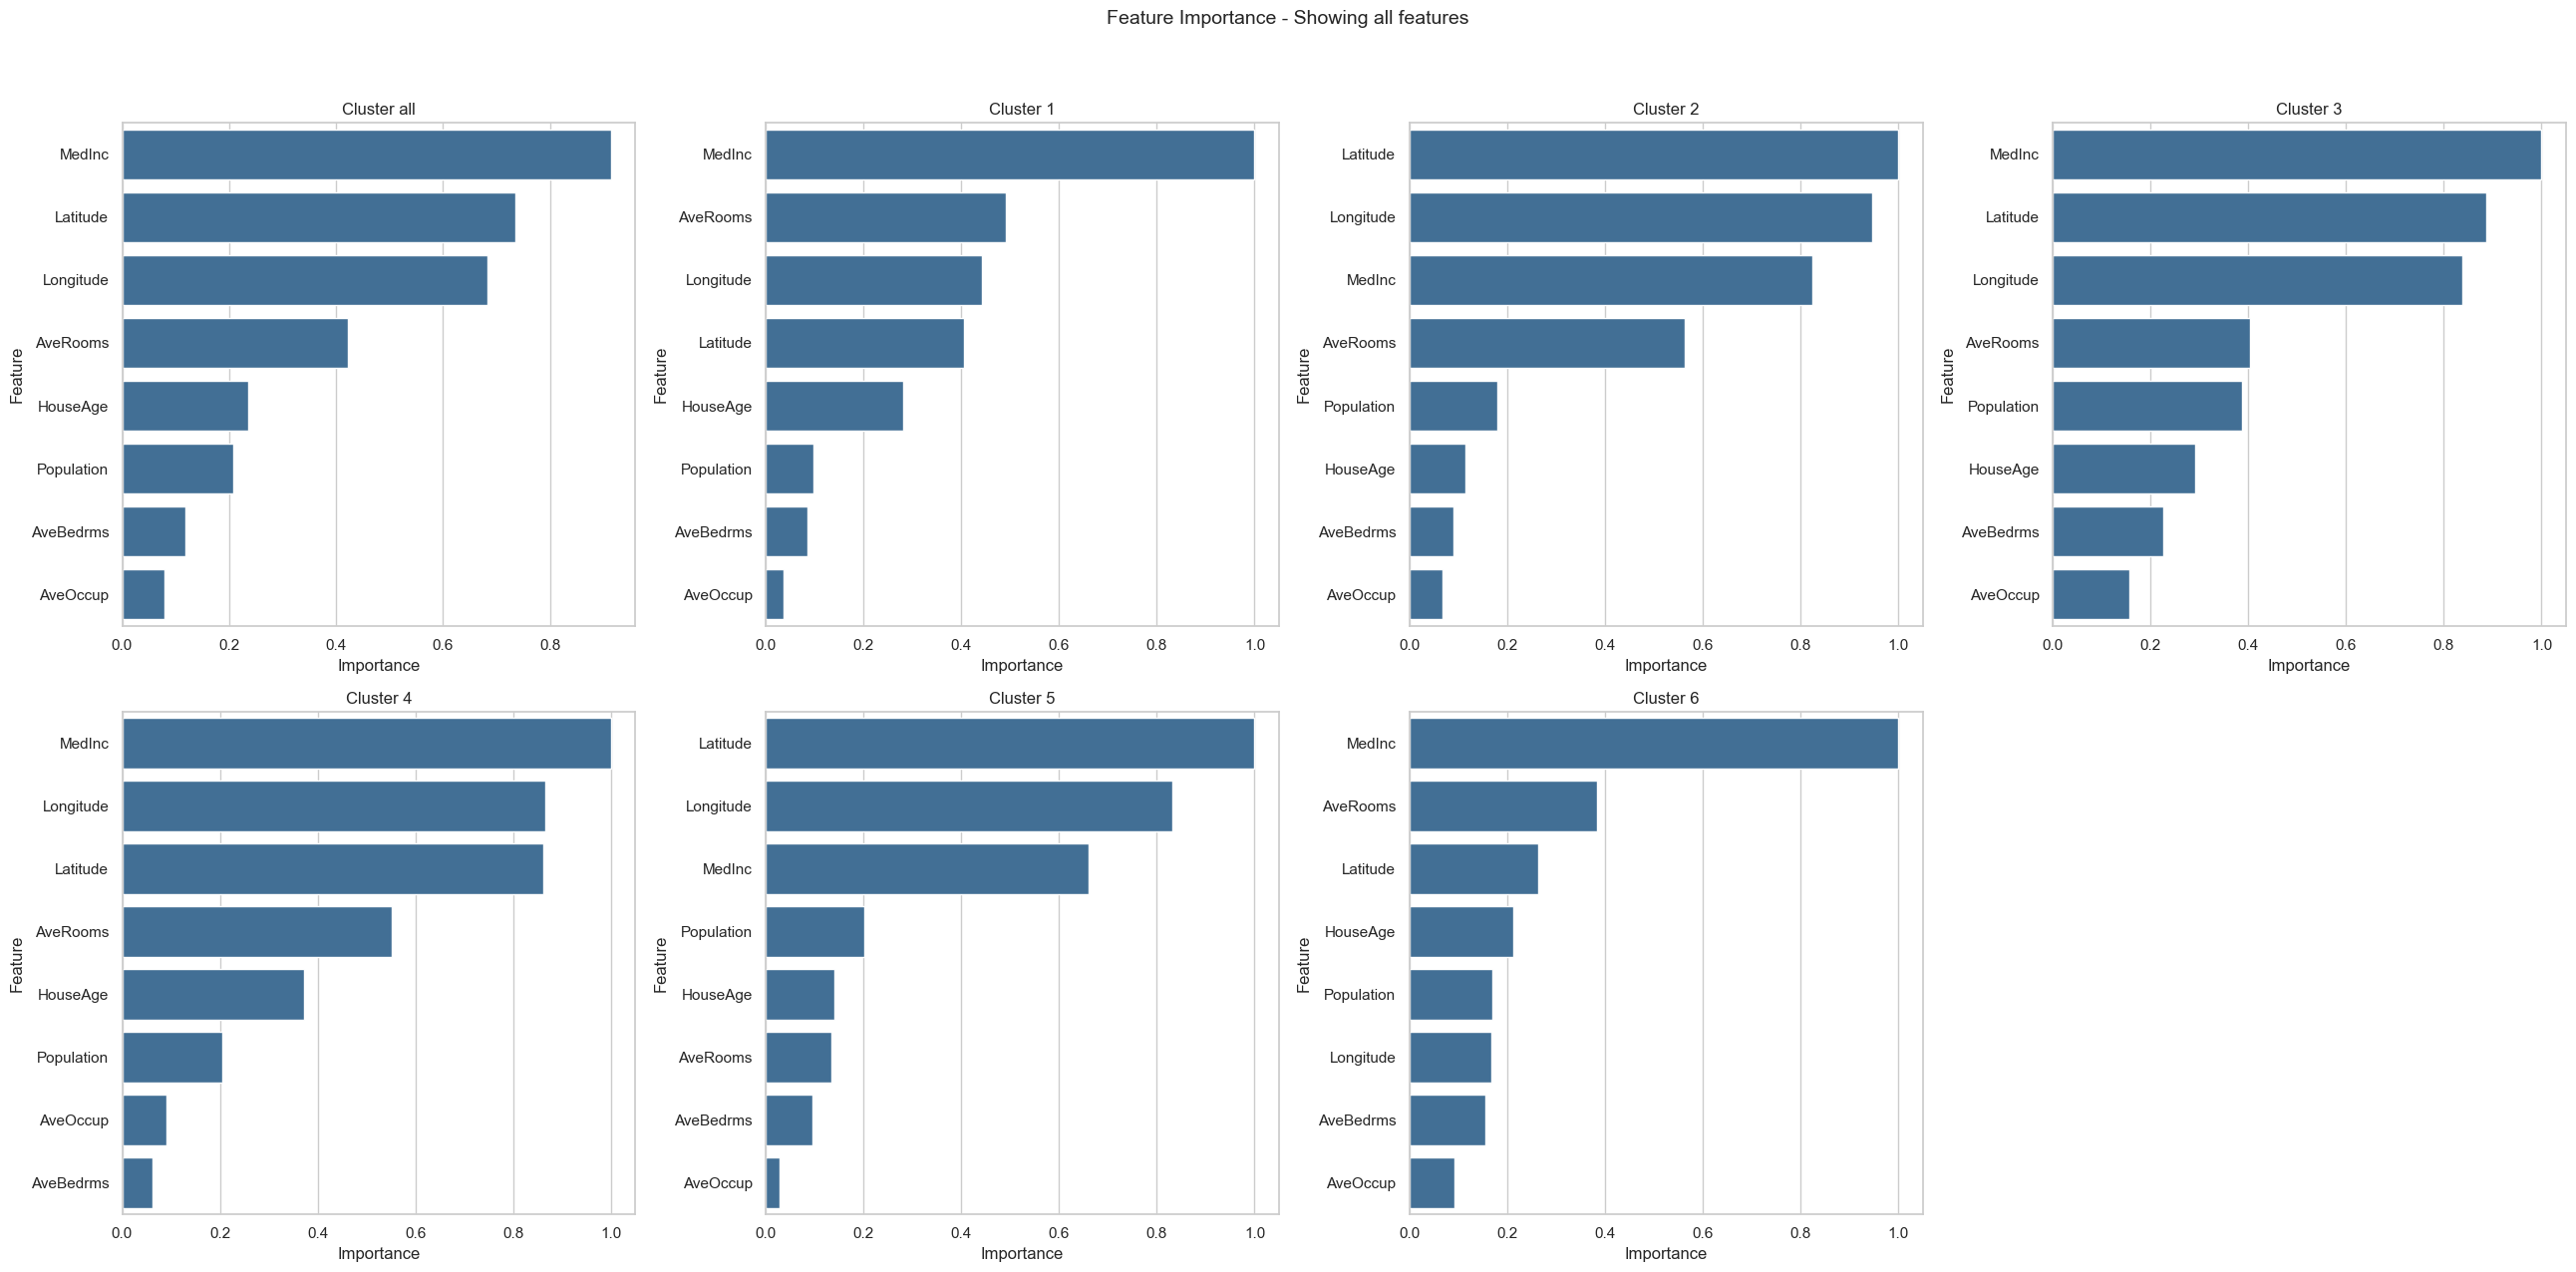

In [23]:
plot_forest_guided_feature_importance(
    feature_importance_local=feature_importance.feature_importance_local,
    feature_importance_global=feature_importance.feature_importance_global
)

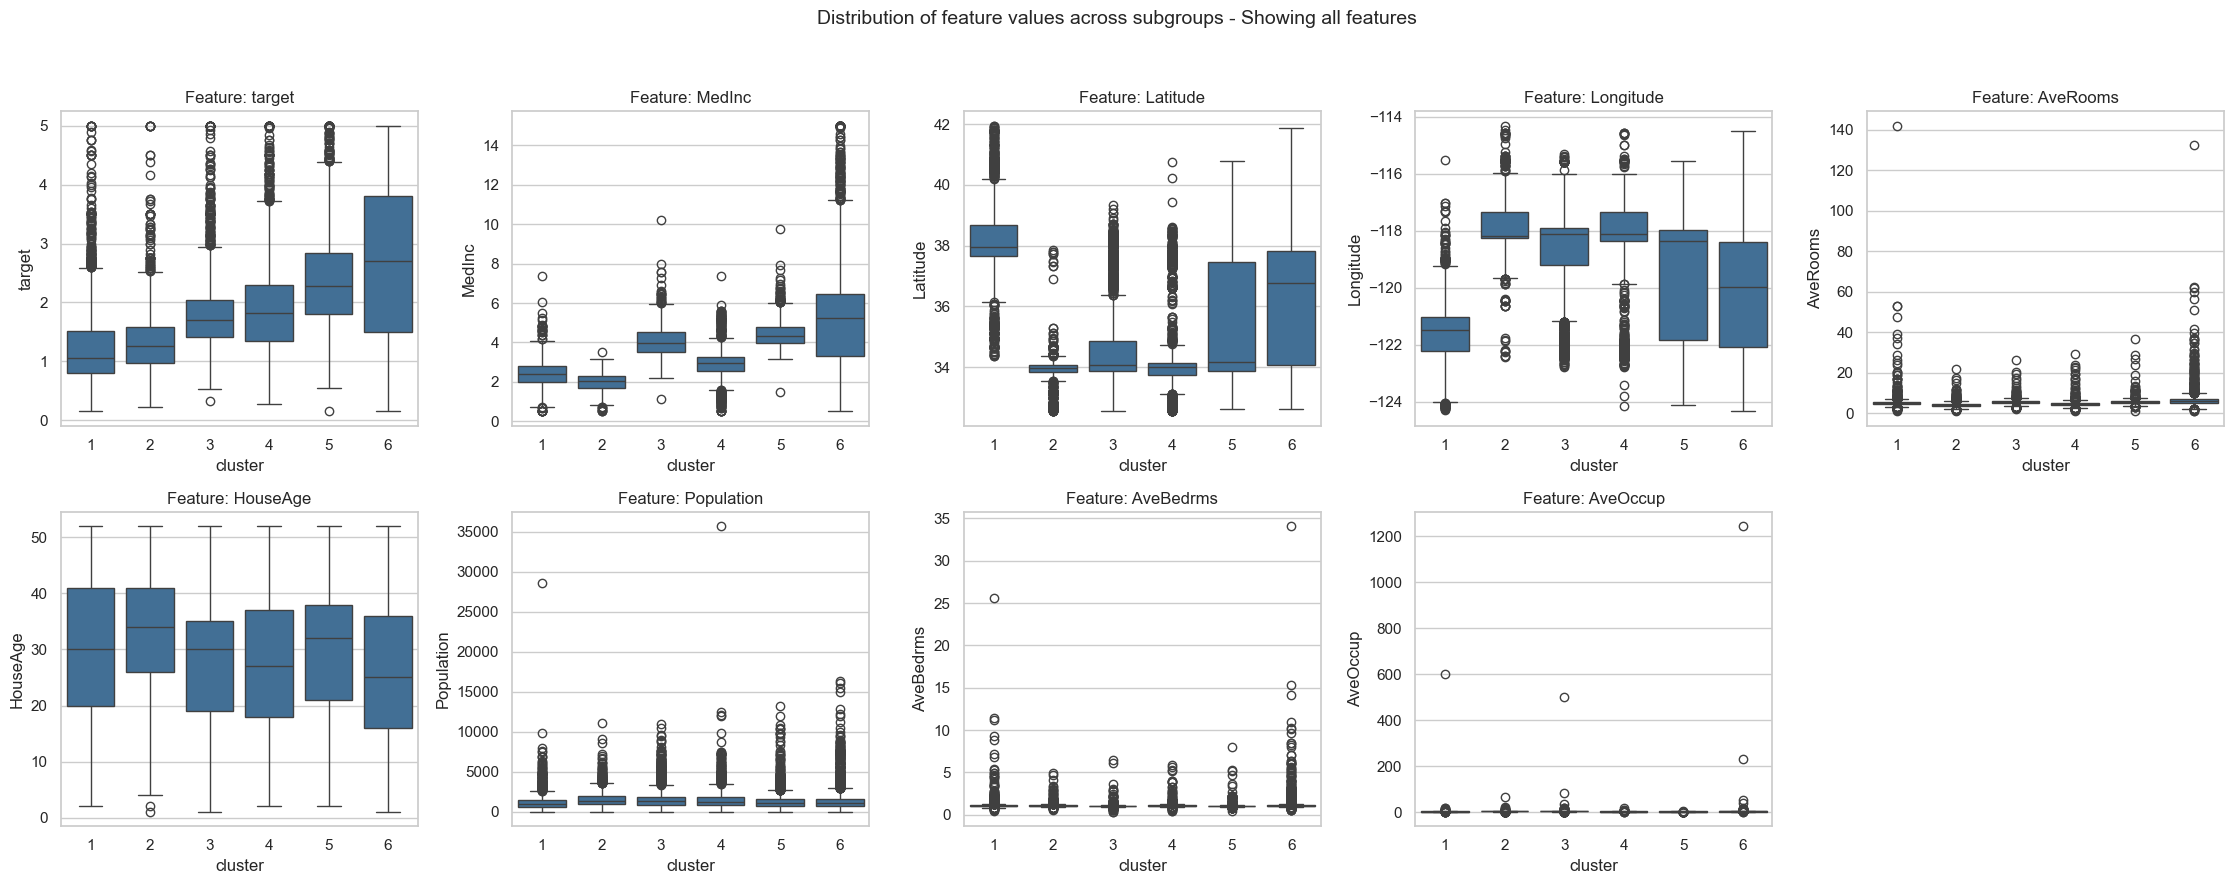

In [24]:
plot_forest_guided_decision_paths(
    data_clustering=feature_importance.data_clustering,
    model_type=fgc.model_type,
    heatmap=False,
    num_cols=5
)